# Exploratory Data Analysis
## 13
## Measuring Blood Pressure using Doppler Ultrasound
Patient blood pressure data is used by physicians to make diagnostic and treatment decisions, yet blood pressure measurements can be widely inaccurate and vary by up to 5 mmHg.  There is a need for a more accurate, reliable, blood pressure measurement device.  The following dataset was collected as a part of a design project to develop such a device by measuring blood pressure by using doppler ultrasound.

## The Dataset
A Sonoline B Fetal Doppler device was used to monitor blood flow at the radial artery on Subject #1.  A manual blood pressure cuff was used to occlude blood flow at pressures starting at 140 mmHg and decreasing by 10 mmHg until 50 mmHg.  Data was also collected at 0 mmHg.  Each pressure was monitored for 5 seconds, or 5 heartbeats at a resting heart rate of 60 BPM.  The volume output of the Sonoline B Fetal Doppler was monitored with an oscilloscope.  The dataset consists of the oscilloscope output as Voltage (V) vs Time (s) over 5 seconds at a resolution of 400 Hz (400 data points/second).  Data was collected on 1/25/2018.  The plots below show Voltage (V) vs Time (s) at each measured occluded pressure for 5 seconds. The code can be altered to filter the data (see the "Clean data - Apply a filter" section).

## Insights
The purpose of collecting and analyzing this data was to determine if the signal showed distinct differences at systolic and diastolic pressure. The subject's manually measured blood pressure was 110/70. As seen from the plots, the signal changes from flat to visible singular peaks between 110 and 100 mmHg, implying that systolic blood pressure is between 110 and 100 mmHg.  Diastolic pressure is more difficult to determine from the signal.  However, the signal changes from singular peaks to distinct double peaks at 60 mmHg, implying that diastolic pressure is between 70 and 60 mmHg.  Therefore, it can be concluded that this method of using doppler ultrasound to measure blood pressure is worth pursuing. 

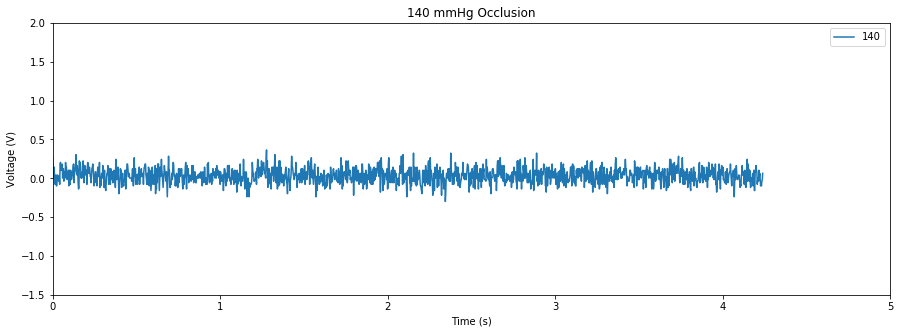

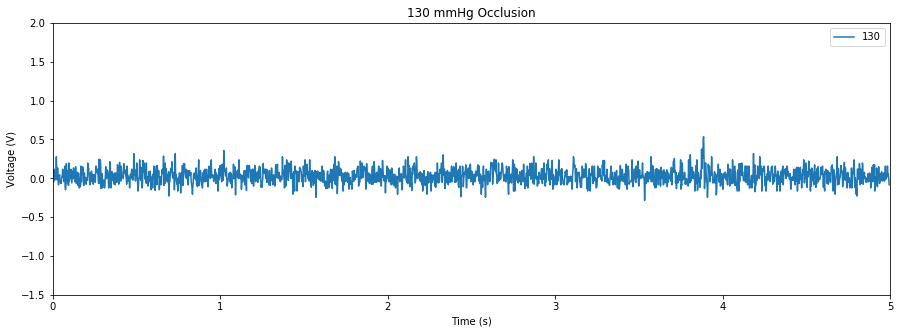

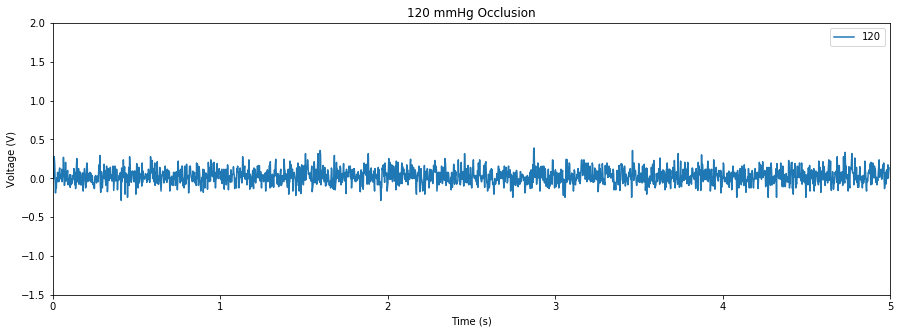

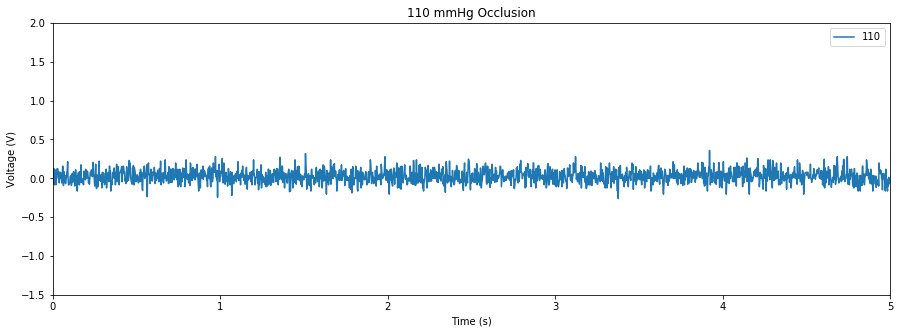

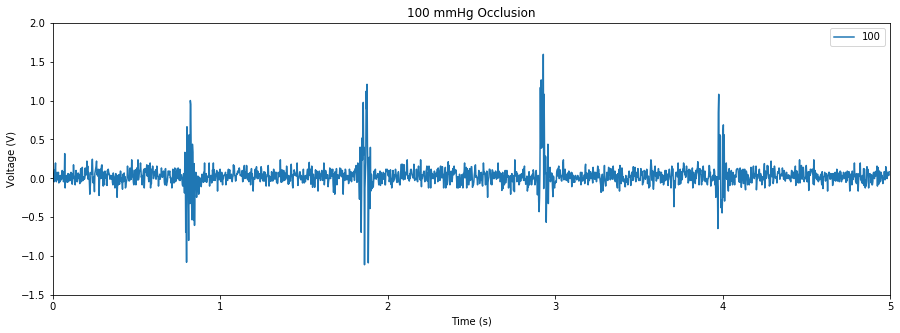

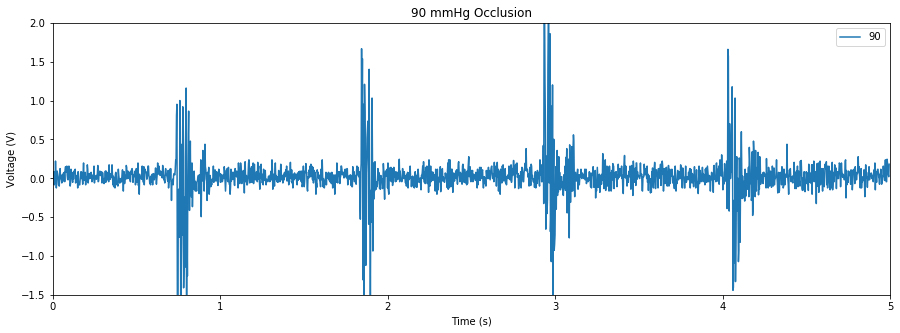

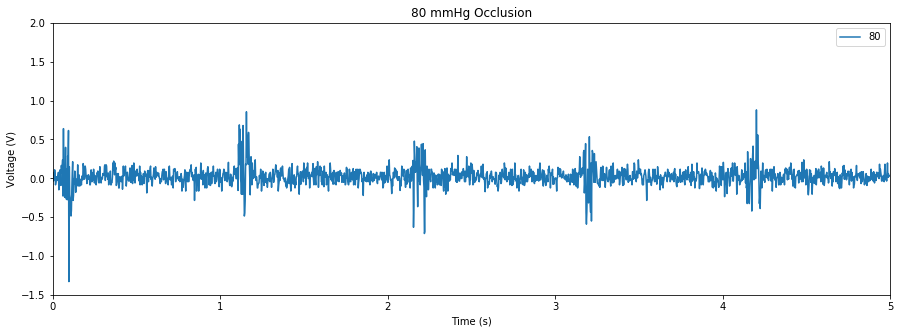

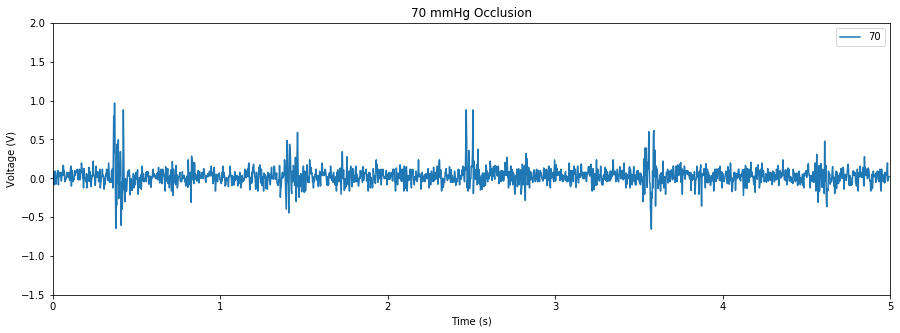

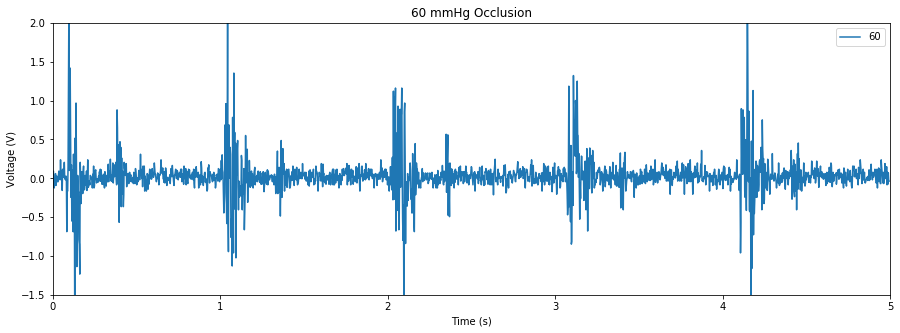

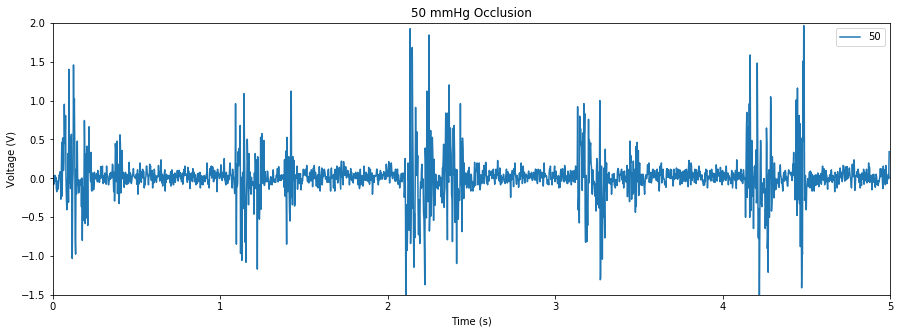

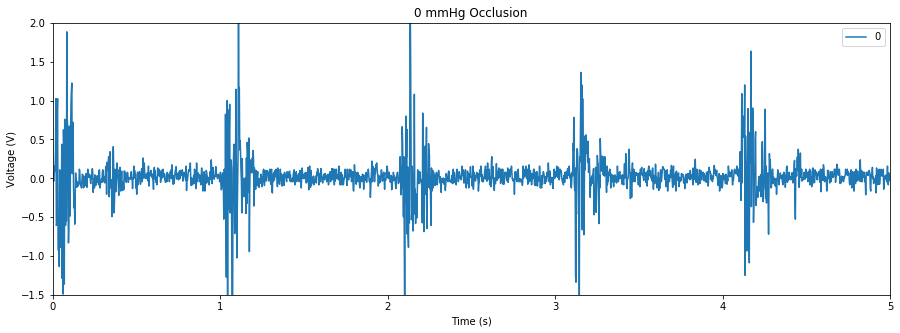

In [289]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal

# Import data
df = pd.read_csv('./raw_data/scope_0.csv')
df = df.loc[1:]
df = df.rename(columns={'1': 140, 'x-axis':'Time (s)'})
df = pd.concat([pd.to_numeric(df['Time (s)']), pd.to_numeric(df[140])], axis = 1)
df['Time (s)'] = df['Time (s)'] + 2.5

clabel=130
for x in range(2, 11):
    mydata = pd.read_csv('./raw_data/scope_{}.csv'.format(x))
    mydata = mydata.loc[1:, ['1']]
    mydata = mydata.rename(columns={'1': clabel} )
    df =pd.concat([df, pd.to_numeric(mydata[clabel])], axis=1)
    clabel=clabel - 10
    
mydata = pd.read_csv('./raw_data/scope_1.csv')
mydata = mydata.loc[1:, ['1']]
mydata = mydata.rename(columns={'1': 0} )
df = pd.concat([df, pd.to_numeric(mydata[0])], axis = 1)

#Clean data - Apply a filter
lpf_df = df.copy()
for column in lpf_df.columns:
    if type(column) is int:
        xn = lpf_df[column].values
        #y  = signal.savgol_filter(xn, 7, 3)
        y = xn
        lpf_df[column] = pd.Series(y)

#Plot data
for column in lpf_df.columns:
    if type(column) is int:
        lpf_df.plot(x='Time (s)', y = column, figsize = (15, 5))
        plt.ylabel('Voltage (V)')
        plt.ylim(-1.5, 2)
        plt.title(str(column)+ " mmHg Occlusion")
        plt.show()
